In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
test_set = pd.read_csv("../Datasets/test.csv")
train_set = pd.read_csv("../Datasets/train.csv")

In [6]:
test_set.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [8]:
train_set.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


### Data:

Date of joining: YYYY-MM-DD

Gender: Female / Male

Company Type: Service / Product

WFH Setup Available: Yes / No

Designation: Number

Resource Allocation: Number

Mental Fatigue: Number

Burn Rate: Number


------------------------

### Get Dummies

In [17]:
test_gender = pd.get_dummies(test_set['Gender'])
test_company_type = pd.get_dummies(test_set['Company Type'])
test_wfh = pd.get_dummies(test_set['WFH Setup Available'])

test_set_vtwo = pd.concat([test_set, test_gender], axis=1)
test_set_vtwo = pd.concat([test_set_vtwo, test_company_type], axis=1)
test_set_vtwo = pd.concat([test_set_vtwo, test_wfh], axis=1)

In [18]:
test_set_vtwo.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Female,Male,Product,Service,No,Yes
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7,1,0,0,1,1,0
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,1,0,1,0,0,1
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,0,1,1,0,0,1
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6,1,0,0,1,1,0
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4,1,0,1,0,1,0


In [19]:
train_gender = pd.get_dummies(train_set['Gender'])
train_company_type = pd.get_dummies(train_set['Company Type'])
train_wfh = pd.get_dummies(train_set['WFH Setup Available'])

train_set_vtwo = pd.concat([train_set, train_gender], axis=1)
train_set_vtwo = pd.concat([train_set_vtwo, train_company_type], axis=1)
train_set_vtwo = pd.concat([train_set_vtwo, train_wfh], axis=1)

In [20]:
train_set_vtwo.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,1,0,1,0,0,1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,0,1,1,0


----------------------------

### Data exploration

In [26]:
train_set.isnull().any()

Employee ID             False
Date of Joining         False
Gender                  False
Company Type            False
WFH Setup Available     False
Designation             False
Resource Allocation      True
Mental Fatigue Score     True
Burn Rate                True
dtype: bool

<AxesSubplot:>

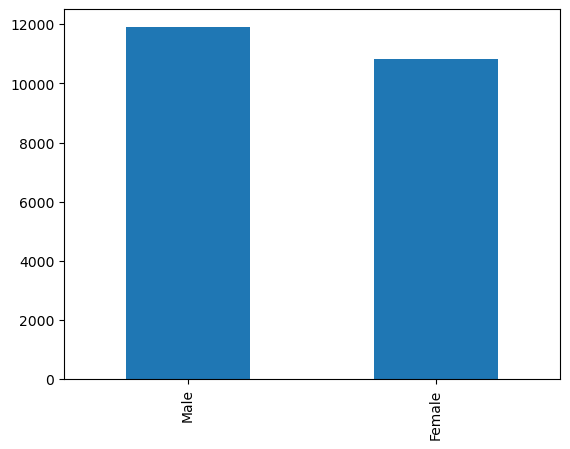

In [28]:
# Gender Visualization
gender_freq = train_set['Gender'].value_counts()
gender_freq.index = ['Male', 'Female']
gender_freq.plot(kind='bar')

<AxesSubplot:>

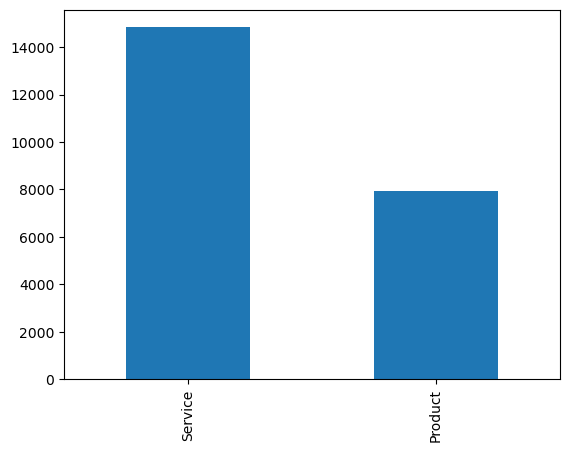

In [30]:
# Company type Visualization
company_type_freq = train_set['Company Type'].value_counts()
company_type_freq.index = ['Service', 'Product']
company_type_freq.plot(kind='bar')

<AxesSubplot:>

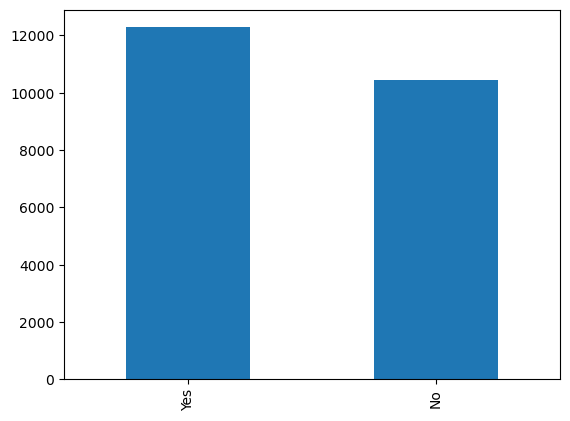

In [32]:
# WFH Setup Available Visualization
wfh_freq = train_set['WFH Setup Available'].value_counts()
wfh_freq.index = ['Yes', 'No']
wfh_freq.plot(kind='bar')

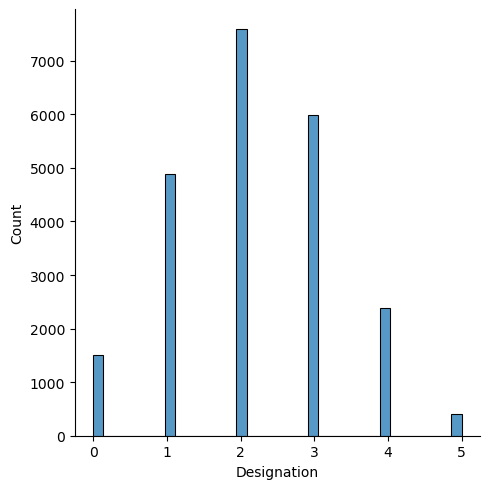

In [37]:
# Designation Visualization
sns.displot(train_set, x='Designation', height=5)

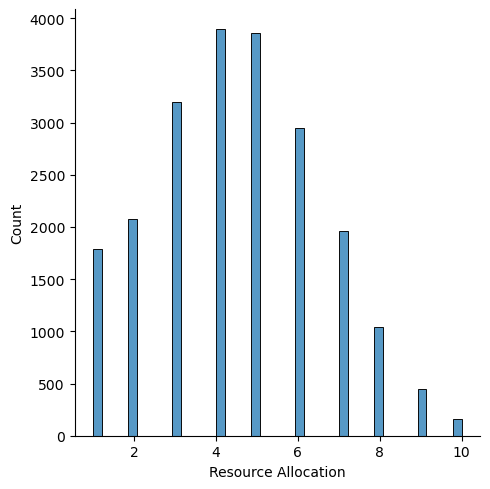

In [38]:
# Resource Allocation Visualization
sns.displot(train_set, x='Resource Allocation', height=5)

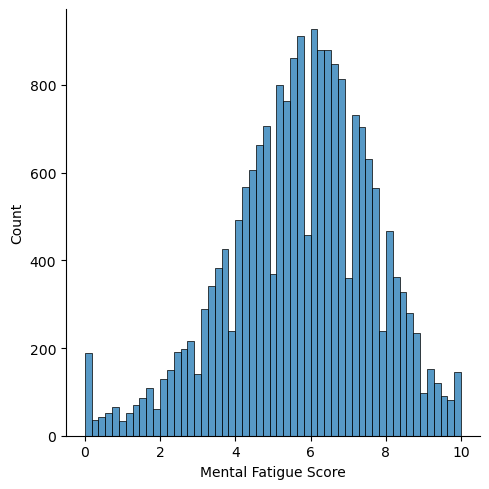

In [39]:
# Mental Fatigue Score Visualization
sns.displot(train_set, x='Mental Fatigue Score', height=5)

---------------

### Delete unusable data

In [40]:
train_set_vtwo.drop(['Employee ID'], axis=1, inplace=True)

In [41]:
train_set_vtwo.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,1,0,1,0,0,1
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,0,1,1,0


In [42]:
test_set_vtwo.drop(['Employee ID'], axis=1, inplace=True)

In [43]:
train_set_vtwo.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,1,0,1,0,0,1
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,0,1,1,0
